In [77]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import math
from scipy.io import wavfile


In [78]:
IR = wavfile.read('../../util/ir-generator/ir\'s/OwnHammer_412_MAR-CB_V30-CH_T2_Room.wav')[1].astype(np.float64)[:256:2]
sound =  wavfile.read(r'../../sim/cocotb/simulate_sound/sample.wav')[1][::2].flatten().astype(np.float64)

IR /= np.abs(IR).max()
sound /= sound.max()

print(len(sound))


533778


In [79]:
fft_ir = fft.fft(IR)
fft_sound = fft.fft(sound)

fft_ir = np.pad(fft_ir, (0, len(fft_sound) - len(fft_ir)))

TRUE_FFT = np.real(fft.ifft(fft_ir * fft_sound))

In [85]:
def small_conv(signal: np.ndarray, ir: np.ndarray) -> np.ndarray:
     signal = np.pad(signal, (0, len(ir) - len(signal)))
     return np.real(fft.ifft(fft.fft(signal) * fft.fft(ir)))

WINDOWS_SIZE = len(IR) 
sm_ir = np.pad(IR, (0, WINDOWS_SIZE))
FILTERED = np.zeros(((len(sound)//WINDOWS_SIZE+1)* WINDOWS_SIZE,))

for i in range(len(sound) // WINDOWS_SIZE - 1):
     begin, end = i*WINDOWS_SIZE, (i+1)*WINDOWS_SIZE
     window = sound[begin: end]
     window = small_conv(window, sm_ir)
     FILTERED[begin: begin+len(window)] =  FILTERED[begin: begin+len(window)] + window


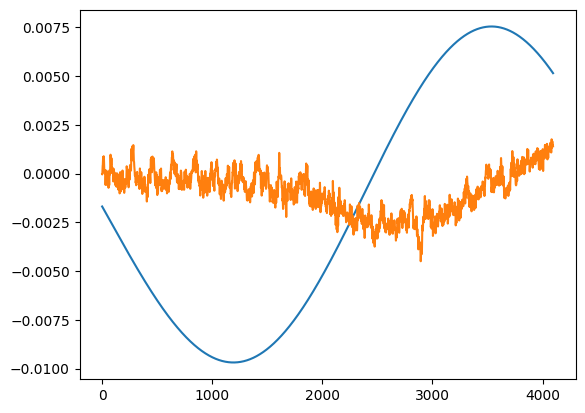

In [86]:
plt.plot(TRUE_FFT[:4096])
plt.plot(FILTERED[:4096])
plt.show()

In [87]:
wavfile.write('TRUE_FFT.wav', 44100, TRUE_FFT)
wavfile.write('FILTERED.wav', 44100, FILTERED)